# Matern regression model

In progress

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from pysip.regressors import Regressor
from pysip.statespace import Matern32

In [3]:
# Generate artificial data
np.random.seed(1)
N = 20
t = np.sort(np.random.rand(1, N), axis=1).flatten()
y = np.sin(12 * t) + 0.66 * np.cos(25 * t) + np.random.randn(1, N) * 0.01
y = y.flatten()
df = pd.DataFrame(index=t, data=y, columns=["y"])

In [4]:
# Parameter settings for the Matérn covariance function with smoothness = 3/2
parameters = [
    dict(name="mscale", value=0.5, transform="log"),
    dict(name="lscale", value=0.5, transform="log"),
    dict(name="sigv", value=0.1, transform="log"),
]

In [5]:
reg = Regressor(Matern32(parameters), outputs="y")
fit_summary, corr_matrix, opt_summary = reg.fit(df=df)

Optimization terminated successfully.
         Current function value: -1.824165
         Iterations: 17
         Function evaluations: 133
         Gradient evaluations: 19


In [6]:
# Predict on test data
tnew = np.linspace(-0.1, 1.1, 500)
ds = reg.predict(df=df, tnew=tnew, smooth=True)
ym = ds["y_mean"].sel(outputs="y")
ysd = ds["y_std"].sel(outputs="y")

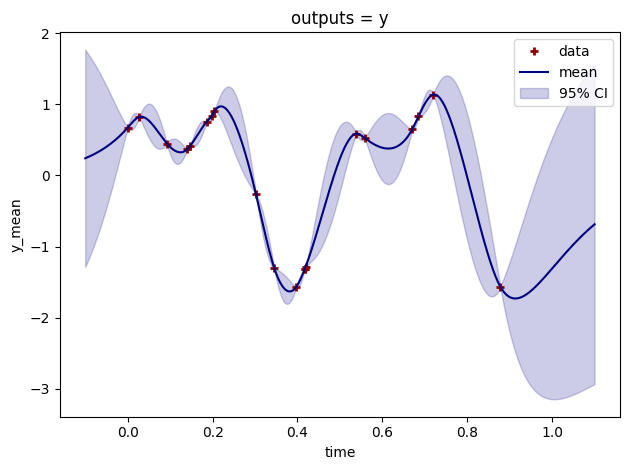

In [7]:
# Plot output mean and 95% credible intervals
plt.plot(t, y, linestyle="", marker="+", mew=2, label="data", color="darkred")
ym.plot(color="navy", label="mean")
plt.fill_between(
    ym.time,
    ym - 2 * ysd,
    ym + 2 * ysd,
    color="darkblue",
    alpha=0.2,
    label=r"95% CI",
)
plt.tight_layout()
plt.legend()